In [37]:
import skimage.io
import sklearn.cluster

import lib.ocr

import matplotlib.pyplot as plt
%matplotlib inline

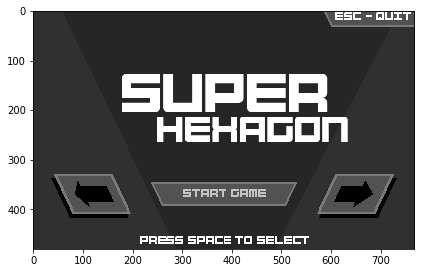

In [38]:
frame = skimage.io.imread("datasets/frame_splash.png")
skimage.io.imshow(frame)

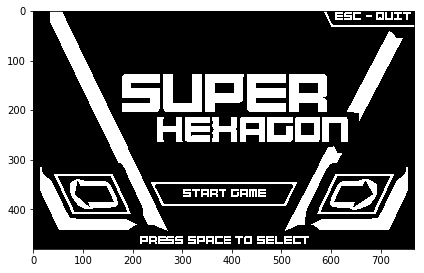

In [39]:
preprocessed_frame = lib.ocr.preprocess_image(frame, mode="PRECISE")
skimage.io.imshow(preprocessed_frame)

CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 547 µs


NameError: name 'mpatches' is not defined

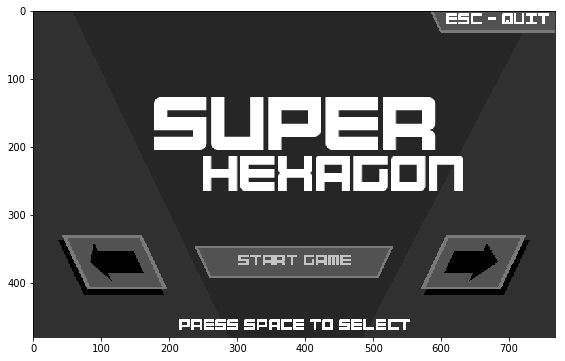

In [40]:
%time
data = lib.ocr.extract_character_and_word_data(
    frame, 
    word_window_shape="rectangle", 
    word_window_size=(1, 1),
    preprocess_mode="PRECISE"
)

data["word"]["bounding_boxes"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(frame)

for region_bbox in data["word"]["bounding_boxes"]:
    minr, minc, maxr, maxc = region_bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, rectangle
from skimage.color import label2rgb

thresh = threshold_otsu(preprocessed_frame)
bw = closing(preprocessed_frame > thresh, rectangle(1, 1))

plt.figure()
plt.imshow(bw, cmap="gray")

cleared = clear_border(bw)

plt.figure()
plt.imshow(cleared, cmap="gray")

label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=preprocessed_frame)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

NameError: name 'preprocessed_frame' is not defined

In [ ]:
skimage.io.imshow(preprocessed_frame)

In [ ]:
objects = lib.ocr.detect_image_objects_closing(preprocessed_frame, window_size=1)

In [ ]:
image_data = lib.ocr.normalize_objects(preprocessed_frame, objects[20:29])

In [ ]:
skimage.io.imshow(image_data[2])

In [ ]:
%time
skimage.io.imshow(clear_border(preprocessed_frame))

In [ ]:
import numpy as np
from skimage import exposure

from skimage.filters import threshold_otsu
from skimage.morphology import closing, square

def preprocess_image(image):
    print(image.dtype)
    grayscale_image = skimage.color.rgb2gray(image)
    print(grayscale_image.dtype)

    lower, higher = np.percentile(grayscale_image, (5, 95))
    contrast_image = exposure.rescale_intensity(grayscale_image, in_range=(lower, higher))
    
    print(contrast_image.dtype)

    threshold = threshold_otsu(contrast_image)
    bw = closing(contrast_image > threshold, square(1))

    return bw

In [ ]:
preprocessed_frame = preprocess_image(frame)

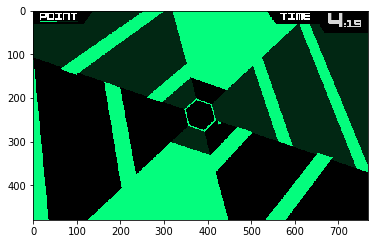

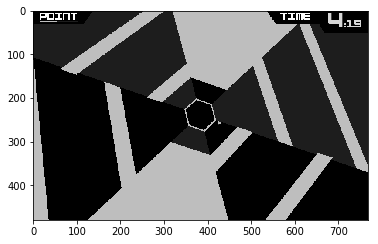

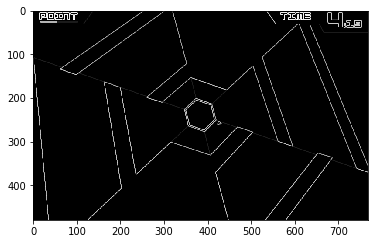

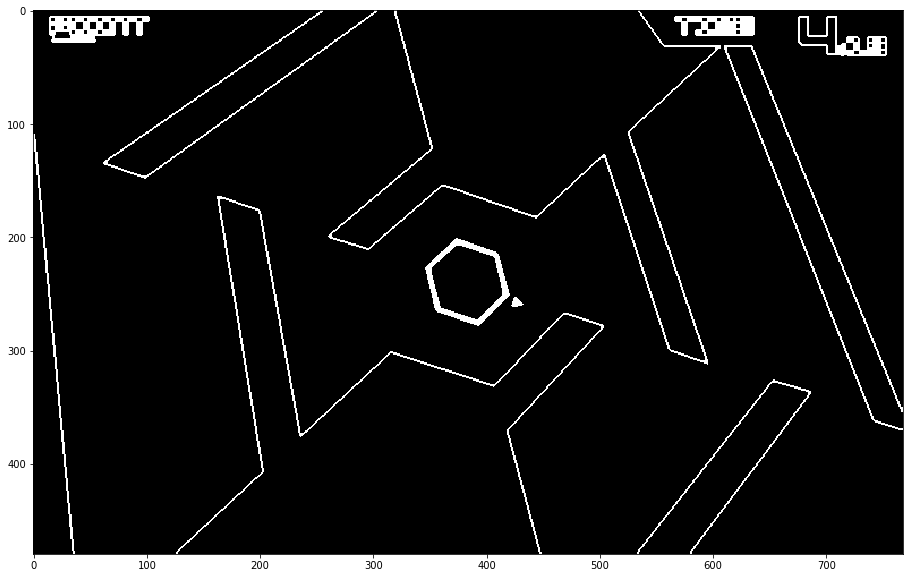

In [66]:
import skimage.io
import skimage.color
import skimage.filters
import skimage.exposure
import skimage.transform
import skimage.morphology

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

frame = skimage.io.imread("datasets/collect_frames/frame_6f863d81-84b9-4acc-a92b-5847131ce38d.png")
plt.figure()
plt.imshow(frame)

gray_frame = np.array(skimage.color.rgb2gray(frame) * 255, dtype="uint8") # cast it back to uint8
plt.figure()
plt.imshow(gray_frame, cmap="gray")

edge_frame = sobel(skimage.color.rgb2gray(frame))

plt.figure()
plt.imshow(edge_frame, cmap="gray")

threshold = skimage.filters.threshold_otsu(edge_frame)
bw_frame = skimage.morphology.closing(edge_frame > threshold, skimage.morphology.square(3))

# threshold = skimage.filters.threshold_otsu(gray_frame[40:])
# bw_frame =edge_frame > threshold
plt.figure(figsize=(16, 10))
plt.imshow(bw_frame, cmap="gray")

In [33]:
label_image = label(bw_frame)
image_label_overlay label_image = label(bw_frame)
image_label_overlay = label2rgb(label_image, image=bw_frame)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    if region.area < 200:
        minr, minc, maxr, maxc = region.bbox
        
        if minr > 50:
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)= label2rgb(label_image, image=bw_frame)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    if region.area < 200:
        minr, minc, maxr, maxc = region.bbox
        
        if minr > 50:
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (<ipython-input-33-f543d7eafd82>, line 2)

In [2]:
center = [c // 2 for c in bw_frame.shape]

In [3]:
def angles_to_center(points, center):
    xs = points[1] - center[1]
    ys = points[0] - center[0]
    
    return np.rad2deg(np.arctan2(xs, ys)).astype("int16")

0


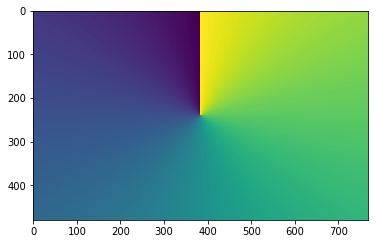

In [4]:
frame_angles = angles_to_center(np.indices(bw_frame.shape), np.array(center))
print(frame_angles[400, center[1]])

plt.imshow(frame_angles)

In [5]:
frame_angles

array([[-122, -122, -122, ...,  122,  122,  122],
       [-121, -121, -122, ...,  122,  122,  121],
       [-121, -121, -121, ...,  121,  121,  121],
       ..., 
       [ -58,  -58,  -58, ...,   58,   58,   58],
       [ -58,  -58,  -58, ...,   58,   58,   58],
       [ -58,  -58,  -57, ...,   57,   57,   58]], dtype=int16)

In [75]:
from plugins.SuperHexagonGameAgentPlugin.files.helpers.frame_processing import *

print(bw_frame.dtype)

player_bounding_box = get_player_character_bounding_box(bw_frame, (129, 264, 366, 513))
player_bounding_box_center = (
    (player_bounding_box[0] + player_bounding_box[2]) // 2,
    (player_bounding_box[1] + player_bounding_box[3]) // 2,
)

player_to_center_angle = frame_angles[player_bounding_box_center]

bw_frame[frame_angles == player_to_center_angle] = 1
bw_frame[frame_angles == player_to_center_angle + 15] = 1
bw_frame[frame_angles == player_to_center_angle - 15] = 1

bool
(112, 129, 113, 130)
(113, 125, 114, 126)
(113, 137, 114, 140)
(115, 130, 116, 131)
(116, 133, 117, 134)
(116, 161, 117, 168)
(117, 135, 118, 136)
(118, 138, 119, 139)
(119, 140, 120, 141)
(120, 143, 121, 144)
(121, 145, 122, 147)


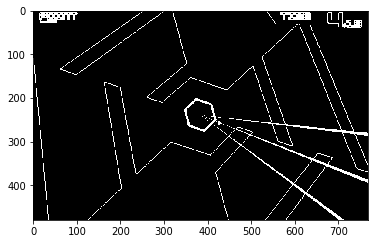

In [76]:
plt.imshow(bw_frame, cmap="gray")

In [77]:
skimage.io.imsave("test.png", np.array(bw_frame * 255, dtype="uint8"))